In [7]:
# ===================================================================================================
# ============================================ IMPORTS ==============================================
# ===================================================================================================
import sys
sys.path.insert(1,'/Users/charlesh/Documents/Codes/')
sys.path.append('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS')
sys.path.insert(0, '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/COMPS')
sys.path.insert(0, '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/OBStools')
sys.path.insert(0, '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python')

import math
import scipy
import numpy as np
import librosa
import os
import shutil
from scipy.signal import stft, detrend
os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '2'
from obspy import Trace
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.gridspec as gridspec
import matplotlib
import sys
import obspy
import pickle as pkl
import glob as g
from obspy.clients.fdsn import Client
import datetime
import re
import math
from numpy import linalg as eigen
# import noisecut
import matplotlib.colors as mcolors
import matplotlib.cm as cm2
from scipy.stats import norm
import scipy.stats as stats
from scipy import fft
# import ntk
from cmcrameri import cm

from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline #<----Experimental

import ObsQA
import ObsQA as ob
# from ObsQA.classes import OBSMetrics as OBSM
# from ObsQA.plots import qtp
from ObsQA import *
OBSM = OBSMetrics
import obstools as obs
import cmath
from comp_tools import *
from pathlib import Path
from scipy.signal import csd as _csd
NoiseFolder = '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE'
CompFolder = NoiseFolder + '/COMPS/ATaCR_NC'
MethodsFolder = NoiseFolder + '/METHODS/ATaCR'

# ===================================================================================================
# ============================================  LOAD DATA ===========================================
# ===================================================================================================

plotfolder = NoiseFolder + '/COMPS/FigureArchive/_GEN5'
compfolder = CompFolder
ATaCR_Py_DataFolder = ob.io.dir_libraries(MethodsFolder)[1]
dirs = ATaCR_Py_DataFolder
datafolder = ATaCR_Py_DataFolder['Py_DataParentFolder']
eventsfolder = ATaCR_Py_DataFolder['Py_CorrectedTraces']
catalog = pd.read_pickle(eventsfolder + '/event_catalog_updated.pkl')
Station,evi = catalog.iloc[22],3
Event = Station.Events[evi]
# catalog = pd.read_pickle('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/Metrics/EVENTS/EventMetrics_using_STA_avgTFs.pkl')
# catalog = pd.read_pickle('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/EVENTS/event_catalog_updated.pkl')
# catalog = pd.read_pickle(eventsfolder + '/sta_catalog_evrecord_set_goodchans_updated.pkl')
# catalog = catalog.drop(index=29)
catalog = pd.read_pickle(eventsfolder + '/sta_catalog_proxima_test.pkl')

Folder = Path(plotfolder) / 'MeetingFigs'
Folder.mkdir(exist_ok=True)
def smooth(d,k=10):
        return np.convolve(d, np.ones(k) / k, mode='same')
# ###===================================================================================================================================================================
# ###===================================================================================================================================================================
# ========================================================================================================================================================
# ================================================================CODE SNIPPETS===========================================================================
# ========================================================================================================================================================
# for a in cm._cmap_names_categorical:
#     display(cm.__dict__[a].resampled(4))
# # ======================================================================================================================================================
# # ======================================================================================================================================================
# for (Event,Station,Metrics,Comp) in OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder']):
#     print(Event)
# for i,(Event,Station,Metrics,Comp) in zip(range(1),OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder'])):
#     print(Event)
# # ======================================================================================================================================================
# # ======================================================================================================================================================
display(catalog)

,Station,Network,Latitude,Longitude,Experiment,Instrument_Design,Seismometer,Environment,Pressure_Gauge,Water_Depth_m,...,n_events,Magnitude_mw,Origin,Metadata,Averaging,Events,Files,Depth_KM,Network_Experiment,StaName
0,OBS19,2D,33.302101,-123.037300,ALBACORE,B2,Trillium 240,North Pacific,DPG,4374.0,...,31,"[6.5, 6.3, 6.3, 7.0, 7.0, 6.8, 6.9, 6.9, 7.0, ...","[2011-01-09T10:03:43.620000Z, 2011-03-06T12:31...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2011.009.10.03, 2011.065.12.31, 2011.068.21.2...","[2D.OBS19.2011.009.10.03.sta.pkl, 2D.OBS19.201...","[20.7, 114.5, 51.0, 149.3, 24.7, 33.0, 14.8, 4...",[2D] ALBACORE,2D.OBS19
1,OBS06,2D,32.777000,-119.857803,ALBACORE,B2,Trillium 240,North Pacific,DPG,1169.0,...,32,"[7.0, 6.5, 6.5, 6.5, 6.3, 6.5, 6.3, 6.3, 7.0, ...","[2010-09-03T16:35:46.480000Z, 2011-02-21T10:57...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2010.246.16.35, 2011.052.10.57, 2011.012.21.3...","[2D.OBS06.2010.246.16.35.sta.pkl, 2D.OBS06.201...","[4.0, 551.8, 524.5, 414.8, 19.5, 531.2, 86.5, ...",[2D] ALBACORE,2D.OBS06
2,OBS32,2D,33.208500,-118.480202,ALBACORE,B2,Trillium 240,North Pacific,DPG,1248.0,...,32,"[7.0, 6.5, 6.3, 6.5, 6.5, 6.5, 6.5, 7.0, 6.3, ...","[2011-01-01T09:56:58.460000Z, 2011-02-10T14:39...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2011.001.09.56, 2011.041.14.39, 2011.070.05.5...","[2D.OBS32.2011.001.09.56.sta.pkl, 2D.OBS32.201...","[584.3, 532.8, 35.0, 101.2, 524.5, 414.8, 551....",[2D] ALBACORE,2D.OBS32
3,OBS03,2D,33.012901,-118.957397,ALBACORE,B2,Trillium 240,North Pacific,DPG,1730.0,...,32,"[7.0, 6.5, 6.3, 6.5, 6.5, 6.5, 7.0, 6.5, 6.3, ...","[2011-01-01T09:56:58.460000Z, 2011-03-06T14:32...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2011.001.09.56, 2011.065.14.32, 2011.070.05.5...","[2D.OBS03.2011.001.09.56.sta.pkl, 2D.OBS03.201...","[584.3, 101.2, 35.0, 532.8, 414.8, 524.5, 4.0,...",[2D] ALBACORE,2D.OBS03
4,OBS17,2D,33.987000,-123.839996,ALBACORE,B2,Trillium 240,North Pacific,DPG,4426.0,...,31,"[6.3, 6.5, 6.3, 6.8, 6.9, 6.9, 7.0, 6.3, 7.0, ...","[2011-03-09T21:24:52.110000Z, 2011-01-09T10:03...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2011.068.21.24, 2011.009.10.03, 2011.065.12.3...","[2D.OBS17.2011.068.21.24.sta.pkl, 2D.OBS17.201...","[51.0, 20.7, 114.5, 33.0, 14.8, 467.2, 20.5, 9...",[2D] ALBACORE,2D.OBS17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,D,ZN,-9.943400,150.707001,PAPUA,B2,Trillium 240,Solomon Sea,DPG,1040.0,...,30,"[6.0, 6.4, 6.9, 6.7, 6.5, 6.4, 6.7, 6.3, 6.5, ...","[2010-12-24T05:48:54.040000Z, 2010-12-22T21:49...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2010.358.05.48, 2010.356.21.49, 2010.103.23.4...","[ZN.D.2010.358.05.48.sta.pkl, ZN.D.2010.356.21...","[10.0, 31.9, 13.8, 13.9, 45.8, 26.4, 24.2, 27....",[ZN] PAPUA,ZN.D
97,F,ZN,-9.950500,150.200394,PAPUA,B2,Trillium 240,Solomon Sea,DPG,1358.0,...,30,"[6.5, 6.4, 6.7, 6.0, 6.7, 6.4, 6.9, 6.3, 7.0, ...","[2010-09-03T11:16:08.110000Z, 2010-12-23T14:00...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2010.246.11.16, 2010.357.14.00, 2010.064.16.0...","[ZN.F.2010.246.11.16.sta.pkl, ZN.F.2010.357.14...","[45.8, 26.4, 24.2, 10.0, 13.9, 31.9, 13.8, 14....",[ZN] PAPUA,ZN.F
98,G,ZN,-9.333200,149.666794,PAPUA,B2,Trillium 240,Solomon Sea,DPG,555.0,...,30,"[6.3, 6.4, 6.9, 6.7, 6.0, 6.7, 6.4, 6.5, 6.6, ...","[2010-09-07T16:13:33.500000Z, 2010-12-22T21:49...","[[[resource_id, event_type, event_type_certain...","Averaging [sta, sta, sta, sta, sta, sta, st...","[2010.250.16.13, 2010.356.21.49, 2010.103.23.4...","[ZN.G.2010.250.16.13.sta.pkl, ZN.G.2010.356.21...","[14.7, 31.9, 13.8

In [8]:
def save_tight(filename,fig=None,dpi=200,format=None):
        # Saves figure to PDF with no margins. Do not modify
        # plt.gca().set_axis_off()
        # plt.subplots_adjust(top = 1, bottom = 0.0, right = 1, left = 0,hspace = 0.07, wspace = 0.03)
        plt.margins(0.1,0.1)
        # plt.gca().xaxis.set_major_locator(plt.NullLocator())
        # plt.gca().yaxis.set_major_locator(plt.NullLocator())
        if fig is None:
                plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0.05,dpi=dpi,format=format)
        else:
                fig.savefig(filename, bbox_inches = 'tight',pad_inches = 0.05,dpi=dpi,format=format)
        return 'Complete'
def fnotch(d):
        '''The frequency knotch root function described in Crawford et al., 1998.
        depth (d) is in meters. Returned (f) is in Hz.'''
        g = 9.80665
        f = (g/(2*np.pi*d))**0.5
        return f

# _________________________________________________________________________________________________________________
# ||||||||||||||||||||||||||||||||||||||||||||||| HPS Spectrogram Plots (Replicates Zali) |||||||||||||||||||||||||
# _________________________________________________________________________________________________________________
def hps_spectrograms(S_full, S_background, S_hps, frequencies, times,figsize=(11,12)):
        t = times
        f = frequencies
        s = S_full
        cmap = 'magma'
        xlabel = True
        yscale = 'log'
        ax = None
        vmin,vmax = None,None
        fig, axes = plt.subplots(nrows=3, ncols=1,figsize=figsize,height_ratios=[1,1,1],width_ratios=[1],layout='constrained',squeeze=False,sharey='col',sharex='row')
        titles = ['Raw','Noise','Noise Removed']
        for r,s in enumerate([S_full, S_background, S_hps]):
                gax = axes[r,0]
                pc = gax.pcolormesh(t,f, 10*np.log10(s), cmap = cmap, shading= 'auto')
                if (vmin is not None) and (vmax is not None):
                        pc.set_clim(vmin, vmax)
                else:
                        vmin,vmax = pc.get_clim()
                if ylabel:
                        gax.set_ylabel('Frequency (Hz)',fontweight='bold')
                if xlabel:
                        gax.set_xlabel('Time (s)',fontweight='bold')
                gax.set_yscale(yscale)
                gax.set_ylim(f[1],f[-1])
                gax.set_xlim(t[0],t[-1])
                gax.set_title(titles[r],fontweight='bold')
                if fig is not None:
                        fig.colorbar(pc, ax=gax, pad=0.01, label='dB')

# _________________________________________________________________________________________________________________
# ||||||||||||||||||||||||||||||||||||||||||||||| EVENT RECORD FUNCTION |||||||||||||||||||||||||||||||||||||||||||
# _________________________________________________________________________________________________________________
def event_record_plot(evstream,evstream_back=None,linewidth=0.2,trim = (None,None),scales = [1,1],band = None,facecolor=('b','r'),norm = 'trace',figsize = (20,13),phases = ('P','S','SKS','PKiKP','SKiKS','SKSSKS',),evdepth=None,title='',sortindex=None,ax=None,normscale=1.0,residual_fraction=1.0):
        # linewidth=0.2
        # prepare traces
        if evstream_back:
            sets = [evstream_back,evstream] # [UNCORRECT_SET , CORRECT_SET] 
        else:
            sets = [evstream]
        sets = [preparetraces(stream,trim=trim,band=band,sortindex=sortindex) for stream in sets]
        if len(sets)==2:
            residuals = [ev0.data - ev.data for ev0,ev in zip(sets[0],sets[1])]
            residuals = [normscale * residual_fraction * np.array(res) / np.max(np.abs(np.array(res))) for res in residuals]
        fig = None
        if ax is None:
            fig, axes = plt.subplots(nrows=1, ncols=1,figsize=figsize,layout='constrained',squeeze=False,sharey='all',sharex='all')
            ax = axes[0,0]
        # norming for plots
        postsetmax = [np.max(ev.data) for ev in  sets[-1]]
        for si in range(len(sets)):
            for i in range(len(sets[0])): #norm the uncorrected set to the max in the corrected set
                # -----------
                if isinstance(norm,list):
                        sets[si][i].data = sets[si][i].data/norm[i]
                elif norm.lower()=='postset':
                        sets[si][i].data = sets[si][i].data/postsetmax[i]
                elif norm.lower()=='trace':
                        sets[si][i].data = sets[si][i].data/np.max(abs(sets[si][i].data))
                elif norm.lower()=='col':
                        # print('Trace norm scaling by r')
                        dist = [s.stats.sac.dist for s in sets[si]]
                        norms = [d/np.max(dist) for d in dist]
                        norms = [d**(1) for d in norms]
                        sets[si][i].data = sets[si][i].data/np.max(abs(sets[si][i].data))
                        sets[si][i].data = sets[si][i].data / norms[i]
                        colmax = np.max([abs(d.data.max()) for d in sets[si]])
                        sets[si][i].data = sets[si][i].data / colmax
                # -----------
        correctset = sets[-1]
        [ax.plot(tr.times(),tr.data + ysep,linewidth=linewidth,color='k') for ysep,tr in enumerate(correctset)]
        if len(sets)>1:
            for si,s in enumerate(sets):
                [ax.fill_between(tr.times(),tr.data*scales[si] + ysep,tr.data*0 + ysep, where=np.abs(tr.data)>=0, facecolor=facecolor[si]) for ysep,tr in enumerate(s)]
        [ax.plot(tr.times(),tr.data*0 + ysep,linewidth=0.4,color='k') for ysep,tr in enumerate(correctset)]
        if evdepth is not None:
            arrivals = [ObsQA.io.get_arrivals(sta_llaz=(sta.stats.sac.stla,sta.stats.sac.stlo,sta.stats.sac.stel),ev_llaz=(sta.stats.sac.evla,sta.stats.sac.evlo,evdepth),phases=phases) for sta in correctset]
            ardict = dict()
            corephase_dy = 0.2
            direcphase_dy = 0.03
            [[ardict.update({ph[0]:[]}) for ph in a] for a in arrivals]
            [[ardict[ph[0]].extend([ph[1]]) for ph in a] for a in arrivals]
            [ardict.update({k:np.max(ardict[k])}) for k in list(ardict.keys())]
            [[ax.vlines(ph[1], ysep, ysep+1, colors='b',linewidth=0.2) for ph in a] for ysep,a in enumerate(arrivals)]
            [[ax.vlines(ph[1], ysep, ysep+1, colors='r',linewidth=0.5,alpha=0.5) for ph in a if ph[0]=='P'] for ysep,a in enumerate(arrivals)]
            [[ax.vlines(ph[1], ysep, ysep+1, colors='r',linewidth=0.5,alpha=0.5) for ph in a if ph[0]=='S'] for ysep,a in enumerate(arrivals)]
            [ax.text(ardict[k], len(correctset) - corephase_dy, k, color='b',horizontalalignment='center') for k in list(ardict.keys()) if (k!='P') and (k!='S')]
            [ax.text(ardict[k], len(correctset) + direcphase_dy, k, color='r',horizontalalignment='center') for k in list(ardict.keys()) if ((k=='P') or (k=='S'))]
        yl = (-1,len(correctset))
        ax.set_ylim(yl)
        ax.set_xlim(correctset[0].times()[0],correctset[0].times()[-1])
        ax.set_yticks([i for i in range(len(correctset))])
        labels = [str(int(ev.stats.sac.dist)) +'km' + ' [' + ev.stats.network + '] ' + ev.stats.station  + '\n depth:' + str(int(abs(ev.stats.sac.stel*1000))) + 'm' for ev in correctset]
        ax.set_yticklabels(labels)
        ax.set_xlabel('Time(s)')
        if fig is not None:
            fig.suptitle(title,fontweight='bold',fontsize=15)
        return ax
def mirror_audit(evaudit):
  audit = []
  for ev in evaudit.iloc:
    # pass
    # print(ev.Event)
    inside_atacr = []
    inside_hps = []
    for n,s in zip(ev.Networks,ev.Stations):
      stafolder = Path(datafolder) / 'Data' / (n + '.' + s)
      f = '.'.join(ev.Event.split('.')[:2]) + '*.SAC'
      N = len(list((stafolder / 'HPS_Data').glob(f)))
      if N!=4:
        inside_hps.append(False)
      else:
        inside_hps.append(True)
      stafolder = Path(datafolder) / 'EVENTS_Taper_0' / (n + '.' + s)
      N = len(list((stafolder / 'CORRECTED').glob( '*' + f)))
      if N!=4:
        inside_atacr.append(False)
      else:
        inside_atacr.append(True)
    audit.append([np.array(inside_hps),np.array(inside_atacr)])
    return audit

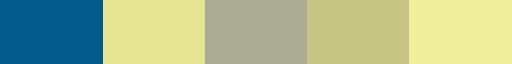

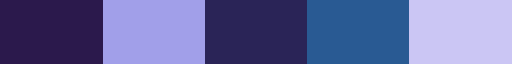

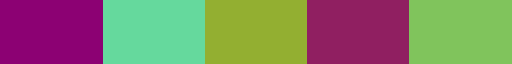

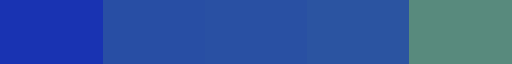

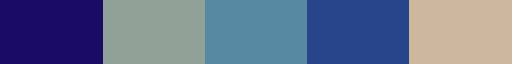

array([['#05598c', '#e5e592', '#aaac96', '#c6c684', '#f0f09e'],
       ['#2c1a4c', '#a2a0ea', '#2b2558', '#2a5b93', '#cbc6f4'],
       ['#8c0273', '#65d99e', '#93af32', '#901f62', '#81c45d'],
       ['#1a33b3', '#284ea5', '#2951a4', '#2b55a2', '#588a7d'],
       ['#1a0c64', '#91a298', '#5789a4', '#28458b', '#ceb99f']],
      dtype='<U7')

In [9]:
NoiseColors = [mcolors.to_hex(m) for m in [cm.__dict__[e].resampled(30).resampled(6).colors for e in ['devon_categorical']][0]]
[display(c) for c in [cm.__dict__[e].resampled(70).resampled(5) for e in ['nuuk_categorical','devon_categorical','hawaii_categorical','imola_categorical','lapaz_categorical']]]
np.array([[mcolors.to_hex(c) for c in r] for r in [cm.__dict__[e].resampled(70).resampled(5).colors for e in ['nuuk_categorical','devon_categorical','hawaii_categorical','imola_categorical','lapaz_categorical']]])

In [10]:
#| _________________________________________________________________________________________________________________________________  |#
#| |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| |#
#| |||||||||||||||||||||||||||||||||||||||||||||||||BEGIN PLOT CODES||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| |#
#| |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| |#
#| _________________________________________________________________________________________________________________________________  |#

In [11]:
# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# |||| 1x3 . SEPARATED BANDS . EVENT RECORDS . PLOT CODE |||||
# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
nsta_bar = 10
# evaudit = ObsQA.io.audit_events(eventsfolder)
evaudit = pd.read_pickle(Path(eventsfolder) / 'event_record_audit.pkl')
evaudit = evaudit[evaudit.nsta>=nsta_bar]
evsilike = ['2011.242.06.57','2010.246.16.35','2011.191.00.57','2011.236.17.46','2010.163.19.26','2010.096.22.15']
evsi = [np.where(evaudit.Event==d)[0][0] for d in evsilike]
evaudit = evaudit.iloc[evsi]
# evaudit = evaudit.iloc[2:]
# evaudit = evaudit[evaudit.MW>=7.1]
display(evaudit)
# folder = 'grouped_bands'
folder = 'separated_bands'

ysep_scl = 1.3
figsize = (14,13)
bands = [(1/10,1),(1/30,1/10),(1/100,1/30)]
trim = (10,7200)
tapers = [0]
# methods = ['PostATACR','PostHPS']
# methods = ['PostATACR']
methods = ['PostHPS']
for correction_method in methods:
  coh_comp = correction_method.replace('PostHPS','HPS').replace('PostATACR','ATaCR')
  if correction_method=='PostHPS':
    return_hps = True
  else:
    return_hps = False
  if return_hps:
    return_atacr = False
  else:
    return_atacr = True
  for taper_mode in tapers:
    OutFolder = Path(plotfolder)
    SubFolders = Path('EventRecords') / ('Taper_' + str(taper_mode)) / correction_method / folder
    OutFolder = OutFolder / SubFolders
    OutFolder.mkdir(parents=True,exist_ok=True)
    for evi,ev in enumerate(evaudit.iloc):
        print('=='*40)
        mirror_test = mirror_audit(ev.to_frame().T)[0]
        mirror_test = np.array(mirror_test[0]) & np.array(mirror_test[1])
        mirror_test = np.where(mirror_test)[0]
        if len(mirror_test)==0:
          print('|| No data mirrors between sets')
          continue
        else:
          print('|| >>> DATASETS MIRROR POPULATION: ' + str(len(mirror_test)))
        if len(mirror_test)<nsta_bar:
          print('Insufficient mirrored data (min:' + str(nsta_bar) + ')')
          continue
        event = ev.Event
        stations = ev.Stations
        networks = ev.Networks.tolist()
        networks = [networks[i] for i in mirror_test]
        stations = [stations[i] for i in mirror_test]
        evdepth = ev.depth
        post_record = Stream()
        pre_record = Stream()
        print('|| [' + str(evi) + '/' + str(len(evaudit)) + '] ' + event + ' | ')
        print('||---Begin load')
        for i,(net,sta) in enumerate(zip(networks,stations)):
          # try:
          Metrics,Comp = get_metrics_comp(net,sta,datafolder,event,return_hps=return_hps,return_atacr=return_atacr,events_folder='EVENTS_Taper_' + str(taper_mode))
          if len(Metrics)==0:
              _ = stations.pop(i)
              _ = networks.pop(i)
              continue
          # except:
          #   _ = stations.pop(i)
          #   _ = networks.pop(i)
          #   continue
          post_record += Comp[correction_method].copy()
          pre_record += Comp['RawZ'].copy()
          del Metrics
          del Comp
          if len(post_record)==0:
            continue
        print('||---Load complete')
        phases = ('P','S','SKS','PKiKP','SKiKS','SKSSKS',)
        # phases = ('P','S',)
        # phases=('ttall',)
        evstream = post_record.copy()
        evstream_back = pre_record.copy()
        facecolor=('b','r')
        title = event
        sortindex = None
        normscale = 0.7
        residual_fraction = 0.5
        for bandi,(band,s) in enumerate(zip(bands,[[1,1],[1,1],[1,1]])):
          band_sec = np.sort([1/b for b in band])
          print('|| Plotting band: ' + str(band_sec[0]) + ' to ' + str(band_sec[-1]) + 's')
          fig, axes = plt.subplots(nrows=1, ncols=2,figsize=figsize,layout='constrained',squeeze=False,sharey='all',sharex='all')
          # fig, axes = plt.subplots(nrows=1, ncols=3,figsize=figsize,layout='constrained',squeeze=False,sharey='all',sharex='all')
          # norms='postset'
          norms = 'trace'
          # norms = 'col'
          # norms = np.array([[abs(c.data).max() for c in s] for s in [pre_record,post_record]]).T.max(axis=1).tolist() #global max norm
          # norms = np.array([[abs(c.data).max() for c in s] for s in [pre_record]]).T.max(axis=1).tolist() #pre max norm
          # norms = np.array([[abs(c.data).max() for c in s] for s in [post_record]]).T.max(axis=1).tolist() #post max norm. >This works well at >m6.5
          for record_i,evstream in enumerate([pre_record,post_record]):
            # File = 'm' + str(ev.MW) + '_z' + str(ev.depth) + 'km' + '_' + event + '_' + str(band_sec[0]) + 'to' + str(band_sec[-1]) + 's_' + correction_method.replace('Post','') + '_T'
            File = 'm' + str(ev.MW) + '_z' + str(ev.depth) + 'km' + '_' + event + '_' + str(band_sec[0]) + 'to' + str(band_sec[-1]) + 's_' + correction_method.replace('Post','')
            fig_title = 'm' + str(ev.MW) + '_z' + str(ev.depth) + 'km' + '_' + '-'.join(event.split('.')[:2]) + ' ' + ':'.join(event.split('.')[2:]) + '_' + str(band_sec[0]) + 'to' + str(band_sec[-1]) + 's_Corrected using ' + correction_method.replace('Post','')
            ax = axes[0,record_i]
            # linewidth = [0.05,0.05,0.05][bandi]
            linewidth = [0.2,0.2,0.2][bandi]
            ax_title = ['Pre-Correction \n ','Post-Correction \n '][record_i]
            title = File.replace('_',' | ').replace('z','z: ').replace('m','mag: m')
            # ---------------
            # More reasonable black and white plots:
            ax = event_record_plot(evstream=evstream,evstream_back=None,norm=norms,scales=s,linewidth=linewidth,figsize=figsize,band=band,trim=trim,facecolor=facecolor,evdepth=evdepth,phases=phases,title=title,sortindex = sortindex,ax=ax,normscale=normscale,residual_fraction=residual_fraction)
            # Use this for those ugly fill mode plots:
            # ax = event_record_plot(evstream=evstream,evstream_back=None,norm=norm,scales=s,linewidth=linewidth,figsize=figsize,band=band,trim=trim,facecolor=facecolor,evdepth=evdepth,phases=phases,title=title,sortindex = sortindex,ax=ax,normscale=normscale,residual_fraction=residual_fraction)
            # ---------------

            ax.set_title(ax_title,fontweight='bold')
            
# --------------------------------------------- Switch between grouped-band and separated bands plots
          # ##### Separated bands
          save_format = 'svg'
          fig.suptitle(fig_title.replace('_',' | ').replace('to',' to '),fontweight='bold',fontsize=15)
          File = File + '.' + save_format
          outfile = OutFolder / File
          save_tight(outfile,format=save_format,dpi=500)
          # fig.savefig(outfile,format=save_format,dpi=400)
        # ##### Grouped bands
        # fig.suptitle(File.replace('_',' | ').replace('to',' to '),fontweight='bold',fontsize=15)
        # save_tight(OutFolder / (File + '.eps' ),dpi=600)
# --------------------------------------------
          plt.close('all')
  print('000'*30)
  print(correction_method + ' ||---EV RECORDS COMPLETE---||')
  print('000'*30)

,Event,Stations,nsta,Networks,MW,depth,ev_lla,ev_lon
89,2011.242.06.57,"[OBS03, OBS06, OBS10, OBS15, OBS17, OBS18, OBS...",13,"[2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 7...",6.9,467.2,-6.3592,126.7502
43,2010.246.16.35,"[OBS03, OBS06, OBS10, OBS15, OBS17, OBS18, OBS...",26,"[2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 7...",7.0,4.0,-43.3608,171.9023
85,2011.191.00.57,"[OBS03, OBS06, OBS10, OBS15, OBS17, OBS18, OBS...",11,"[2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D]",7.0,24.7,38.0553,143.3016
88,2011.236.17.46,"[OBS03, OBS06, OBS10, OBS15, OBS17, OBS18, OBS...",13,"[2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 7...",7.0,149.3,-7.6203,-74.5380
28,2010.163.19.26,"[A02W, A10W, A12W, A14W, B04W, B07W, B09W, B14...",24,"[YL, YL, YL, YL, YL, YL, YL, YL, YL, YL, YL, Y...",7.5,31.4,7.8506,91.9546
19,2010.096.22.15,"[A10W, A12W, A14W, B04W, B07W, B09W, B14W, C01...",21,"[YL, YL, YL, YL, YL, YL, YL, YL, YL, YL, YL, Y...",7.8,33.4,2.3601,97.1113


|| >>> DATASETS MIRROR POPULATION: 13
|| [0/6] 2011.242.06.57 | 
||---Begin load
||---Load complete
|| Plotting band: 1.0 to 10.0s
|| Plotting band: 10.0 to 30.0s
|| Plotting band: 30.0 to 100.0s
|| >>> DATASETS MIRROR POPULATION: 12
|| [1/6] 2010.246.16.35 | 
||---Begin load
||---Load complete
|| Plotting band: 1.0 to 10.0s
|| Plotting band: 10.0 to 30.0s
|| Plotting band: 30.0 to 100.0s
|| >>> DATASETS MIRROR POPULATION: 11
|| [2/6] 2011.191.00.57 | 
||---Begin load
||---Load complete
|| Plotting band: 1.0 to 10.0s
|| Plotting band: 10.0 to 30.0s
|| Plotting band: 30.0 to 100.0s
|| >>> DATASETS MIRROR POPULATION: 13
|| [3/6] 2011.236.17.46 | 
||---Begin load
||---Load complete
|| Plotting band: 1.0 to 10.0s
|| Plotting band: 10.0 to 30.0s
|| Plotting band: 30.0 to 100.0s
|| >>> DATASETS MIRROR POPULATION: 24
|| [4/6] 2010.163.19.26 | 
||---Begin load
||---Load complete
|| Plotting band: 1.0 to 10.0s
|| Plotting band: 10.0 to 30.0s
|| Plotting band: 30.0 to 100.0s
|| >>> DATASETS MIRR

In [12]:
hkjh = jklhk

NameError: name 'jklhk' is not defined

In [ ]:
Comps = dict()
Metrics = dict()
d_hps = ob.io.get_noisecut_event(datafolder,net + '.' + sta,event)
d_hps

# Comps['PostHPS'] = d_hps.Corrected[0]['trZ']
# Comps['PostHPS_H1'] = d_hps.Corrected[0]['tr1']
# Comps['PostHPS_H2'] = d_hps.Corrected[0]['tr2']
# Comps['RawP'] = d_hps.Raw[0]['trP']
# Comps['RawZ'] = d_hps.Raw[0]['trZ']
# Comps['Raw1'] = d_hps.Raw[0]['tr1']
# Comps['Raw2'] = d_hps.Raw[0]['tr2']
# # Comps['PostHPS'],Comps['PostHPS_H1'],Comps['PostHPS_H2'] = get_hps(Raw=Raw,win_length=hps_win_length,width=width) ## The old 2hr noisecut method

# Metrics['HPS'] = OBSMetrics(tr1=Comps['PostHPS_H1'].copy(),tr2=Comps['PostHPS_H2'].copy(),trZ=Comps['PostHPS'].copy(),trP=Comps['RawP'].copy())

In [ ]:
# |||||||||||||||||||||||||||||||||||||||||||||||||||
# |||||| Nx2 . COHERENCE RECORDS . PLOT CODE ||||||||
# |||||||||||||||||||||||||||||||||||||||||| =|||||||||
nsta_bar = 10
# evaudit = ObsQA.io.audit_events(eventsfolder)
evaudit = pd.read_pickle(Path(eventsfolder) / 'event_record_audit.pkl')
evaudit = evaudit[evaudit.nsta>=nsta_bar]
# evaudit = evaudit[evaudit.MW>=7.1]
display(evaudit)
tapers = [0]
methods = ['PostATACR','PostHPS']
correction_method = 'PostATACR'
ysep_scl = 1.3
figsize = (10,10)
for correction_method in methods:
  coh_comp = correction_method.replace('PostHPS','HPS').replace('PostATACR','ATaCR')
  if correction_method=='PostHPS':
    return_hps = True
  else:
    return_hps = False
  for taper_mode in tapers:
    OutFolder = Path(plotfolder)
    SubFolders = Path('EventRecords') / ('Taper_' + str(taper_mode)) / correction_method / 'coherence'
    OutFolder = OutFolder / SubFolders
    OutFolder.mkdir(parents=True,exist_ok=True)
    for evi,ev in enumerate(evaudit.iloc):
        event = ev.Event
        File = 'm' + str(ev.MW) + '_z' + str(ev.depth) + 'km' + '_' + event + '_' + correction_method.replace('Post','') + '_T' + str(taper_mode) + '_COH'
        title = File.replace('_',' | ').replace('z','z: ').replace('m','mag: m')
        print('[' + str(evi) + '/' + str(len(evaudit)) + '] ' + File)
        stations = ev.Stations
        networks = ev.Networks.tolist()
        evdepth = ev.depth
        post_record = Stream()
        pre_record = Stream()
        Metrics = []
        for i,(net,sta) in enumerate(zip(networks,stations)):
          try:
            M,Comp = get_metrics_comp(net,sta,datafolder,event,return_hps=return_hps,events_folder='EVENTS_Taper_' + str(taper_mode))
            M['Noise'] = get_Noise(dirs['Py_DataParentFolder'],net,sta,'sta')['Noise']
            Metrics.append(M.copy())
          except:
            _ = stations.pop(i)
            _ = networks.pop(i)
            continue
          post_record += Comp[correction_method].copy()
          pre_record += Comp['RawZ']
        if len(Metrics)==0:
          continue
        evstream = post_record.copy()
        evstream_back = pre_record.copy()
        title = event
        sortindex = list(np.argsort([np.abs(st.stats.sac.stel*1000) for st in evstream]))
        sortindex.reverse()
        Metrics = [Metrics[s] for s in sortindex]
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=figsize,layout='constrained',squeeze=False,sharey='all',sharex='all')
        for ci,cmp in enumerate(['ZP','ZZ']):
          ax = axes[0,ci]
    # -------------
          if cmp=='ZP':
            [ax.scatter(M['Noise'].Coherence(cmp)[0],M['Noise'].Coherence(cmp)[1] + ysep*ysep_scl,c='gray',s=1) for ysep,M in enumerate(Metrics)]
            [ax.plot(M['Raw'].Coherence(cmp)[0],M['Raw'].Coherence(cmp)[1] + ysep*ysep_scl,c='b',linewidth=0.7) for ysep,M in enumerate(Metrics)]
          if cmp=='ZP':
            [ax.plot(M[coh_comp].Coherence(cmp)[0],M[coh_comp].Coherence(cmp)[1] + ysep*ysep_scl,c='r',linewidth=0.1) for ysep,M in enumerate(Metrics)]
          else:
            [ax.plot(M[coh_comp].Coherence(cmp)[0],M[coh_comp].Coherence(cmp)[1] + ysep*ysep_scl,c='r',linewidth=0.8) for ysep,M in enumerate(Metrics)]
    # -------------
          [ax.plot(M[coh_comp].Coherence(cmp)[0],M[coh_comp].Coherence(cmp)[1]*0 + ysep*ysep_scl,c='k',linewidth=0.1) for ysep,M in enumerate(Metrics)]
          fn = [fnotch(np.round(1000*abs(M['Raw'].traces['Z'][0].stats.sac.stel))) for M in Metrics]
          yticks = [ysep*ysep_scl for ysep,_ in enumerate(Metrics)]
          [ax.plot([f,f],[y,y+1],c='k',linewidth=0.4) for f,y in zip(fn,yticks)]
          [ax.text(f,y+1,'fn',horizontalalignment='center',fontsize=7,fontweight='bold') for f,y in zip(fn,yticks)]
          yticklabels = [str(round(1000*abs(M['Raw'].traces['Z'][0].stats.sac.stel))) + 'm [' + str( M['Raw'].traces['Z'][0].stats.network) + '] ' + str( M['Raw'].traces['Z'][0].stats.station) for M in Metrics]
          ax.set_xscale('log')
          f = Metrics[0][coh_comp].Coherence(cmp)[0]
          ax.set_xlim(f[1],f[-1])
          ax_title = cmp + ' Coherence'
          ax.set_title(ax_title,fontweight='bold')
          ax.set_yticks(yticks)
          ax.set_yticklabels(yticklabels)
          ax.set_ylim(yticks[0],yticks[-1]+1.3)
        fig.suptitle(File.replace('_',' | '),fontweight='bold',fontsize=15)
        save_tight(OutFolder / (File + '.eps' ),dpi=700)
        plt.close('all')
        # || 26min to complete

In [ ]:
# # ||||||||||||||||||||||||||||||||||||||
# # ||||||||||||||| STEM/LEAF PLOTS ||||||
# # ||||||||||||||||||||||||||||||||||||||
# cat = catalog.copy()
# taper_mode = 0
# return_noise = True
# return_hps = False
# events_folder = 'EVENTS_Taper_' + str(taper_mode)
# figsize = (20,14)
# coh_comps = ['ATaCR_ZZ','Noise_ZP','Raw_ZP','ATaCR_ZP','Raw_1Z','ATaCR_1Z','Raw_2Z','ATaCR_2Z']
# nrows = len(coh_comps) + 1
# fig, axes = plt.subplots(nrows=nrows, ncols=1,figsize=figsize,layout='constrained',squeeze=False,sharey='all',sharex='all')
# for stai,Station in enumerate(cat.iloc):
#   Metrics = []
#   for evi,event in enumerate(Station.Events):
#     notify = Station.StaName + ' ' + str(stai+1) + '/' + str(len(cat)) + ' || ' + str(evi+1) + '/' + str(len(Station.Events))
#     try:
#       M,Comp = get_metrics_comp(Station.Network,Station.Station,datafolder,event,return_hps=return_hps,return_noise=return_noise,events_folder=events_folder)
#       Metrics.append(M.copy())
#       print(notify)
#     except:
#       print(notify + ' | 404 Error')
#       continue
#   X = [stai]
#   stats = metric_stats(Metrics)
#   pre_stalta = stats['log_rms_stalta'][:,0]
#   post_stalta = stats['log_rms_stalta'][:,1]
#   ax = axes[0,0]
#   metric_title = 'STA/LTA'
#   for pi,p in enumerate([pre_stalta,post_stalta]):
#     if stai==0:
#       label = ['Pre','Post'][pi]
#     else:
#       label = None
#     Y = [p.mean()]
#     c = ['b','r'][pi]
#     ls = ['-','--'][pi]
#     minmax = np.atleast_2d(np.array([p.min(),p.max()])).T
#     ax.scatter(X,Y,c=c,s=800,marker='_',label=label)
#     ax.scatter(X,Y-p.std(),c=c,s=100,marker='_')
#     ax.scatter(X,Y+p.std(),c=c,s=100,marker='_')
#     # ax.errorbar(X,Y,yerr=minmax,ecolor=c,ls=ls)
#     ax.vlines(X,minmax[0],minmax[1],colors = c,linestyles=ls,linewidth=3)
#     # ax.errorbar(X,Y,yerr=p.std(), ecolor='r',capthick=0)
#   ax.set_title(metric_title + '\n Min/Max : Vertical Lines ' + ' '*10 + 'σ : Short Horiz. Lines' + ' '*10 + 'μ : Long Horiz. Lines',fontweight='bold')
#   ax.set_ylim(0)
#   ax.legend(ncol=2,loc='upper left')
#   band_colors = '#901f62','#588a7d','#284ea5'
#   bands = [[1/100,1/30],[1/30,1/10],[1/10,1]]
#   bands = 1/np.sort(bands)
#   for axi,coh in enumerate(coh_comps):
#     ax = axes[axi+1,0]
#     [ax.stem(X,np.mean((stats['coh_mu_rms_bands'][coh][:,bi])**2)**0.5,markerfmt=band_colors[bi]) for bi in range(len(bands))]
#     ax.set_title(coh.replace('_','-') + ' Coherence RMS')
#     if stai==0:
#       if axi==0:
#         [ax.stem(X,np.mean((stats['coh_mu_rms_bands'][coh][:,bi])**2)**0.5,markerfmt=band_colors[bi],label=str(bands[bi][1]) + '-' + str(bands[bi][0]) + 's',linefmt=band_colors[bi],basefmt='w') for bi in range(len(bands))]
#     ax.legend(ncol=3,loc='upper left')
#     ax.set_ylim(0)
# ax = axes[-1,0]
# xticks = [xsep for xsep,_ in enumerate(cat.iloc)]
# xticklabels = [c.StaName for c in cat.iloc]
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabels,rotation = 90)
# folder = Path(plotfolder) / 'EventRecords' / 'Stats'
# folder.mkdir(exist_ok=True)
# files = 'signal_metrics_taper_' + str(taper_mode)
# save_tight(folder / (files + '.eps' ),dpi=500)
# # || 77min to complete

In [ ]:
# ||||||||| Some old HPS Spectrogram Plot Code |||||||||
# ||||||||||||||||||||||||||||||||||||||||||||||||||||||

# # stas = ['X01','M07A','J59C','G03D','M08A'] #I only have time to print out a few. Choose these.
# sta = None
# # sta = "G03A"
# # sta = "M08A"
# # sta = "LA34"
# evireq = None
# # events_folder = 'EVENTS'
# events_folder = 'EVENTS'
# # sta = ['M08A']
# #### -----
# spectrogram_win_len = 200
# bands = [[1/10,1/100],'Spectrogram']
# nrows,ncols = 3,2
# TauP = True
# # bg_tr_color = '#cbc6f4'
# bg_tr_color = '#3266a7'
# Folder = Path(plotfolder) / 'MeetingFigs' / events_folder
# Folder.mkdir(exist_ok=True)
# (Folder / 'HPS_Spectrograms').mkdir(exist_ok=True)
# for (Event,Station,Metrics,Comp) in OBS_Generator(catalog,parent = ATaCR_Py_DataFolder['Py_DataParentFolder'],sta=sta):
#     label = None
#     File = Station.StaName + '.' + '.'.join(Event.split('.')[0:2]) + '.png'
#     OutPath = str(Folder / File)
#     fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(22,12),height_ratios=[1,1,1],width_ratios=[1,1],layout='constrained',squeeze=False,sharey='col',sharex='row')
#     vmin,vmax = None,None
#     ylabel = True
#     for comp_col,correction_method in enumerate(['ATaCR','HPS','ATaCR_HPS']):
#         fn = np.round(fnotch(Station.Water_Depth_m)*1000)/1000
#         for band_row,band in enumerate(bands):
#                 ax = axes[comp_col,band_row]
#                 label = correction_method.replace('ATaCR_HPS','ATaCR & HPS')
#                 if band_row==0:
#                     ttl = '[' + Station.StaName + '], Station Depth: ' + str(Station.Water_Depth_m) + 'm, Notch: ' + str(fn) + 'Hz \n' + Event + ''
#                     fig.suptitle(ttl,fontweight='bold',y=1.06)
#                 if band_row>0:
#                     label=None
#                 if band_row==0:
#                     ax = Metrics['Raw'].plottrace(ax=ax,component='Z',band=band,color=bg_tr_color,lg=False)
#                     ax = Metrics[correction_method].plottrace(ax=ax,component='Z',band=band,color='k',lg=True,st_llaz = Station.STA_LLAZ,ev_llaz=Station.Event_LLAZ,label=label,phases=('P','S','SKS','PKiKP','SKiKS','SKSSKS',))
#                 elif band=='Spectrogram':
#                     if comp_col==2:
#                         pc,ax = Metrics[correction_method].spectrogram(plot=True,r='Z',fig=fig,ax=ax,window=spectrogram_win_len,vmin=vmin,vmax=vmax,ylabel=ylabel)
#                         vmin,vmax = pc.get_clim()
#                     else:
#                         pc,ax = Metrics[correction_method].spectrogram(plot=True,r='Z',fig=fig,ax=ax,window=spectrogram_win_len,vmin=vmin,vmax=vmax,ylabel=ylabel)
#                     if comp_col==0:
#                         vmin,vmax = pc.get_clim()
#                         ylabel = False
#     save_tight(OutPath)
#     plt.close('all')

#     win_length = 200
#     fs = Comp['PostHPS'].stats.sampling_rate
#     (S_full, S_background, S_hps, frequencies, times) = Comp['PostHPS'].spectrograms
#     win_length_samples = int(round(2**np.ceil(np.log2(win_length*fs))))
#     hop_length = win_length_samples // 4
#     n_fft = win_length_samples
#     S_hps, phase = librosa.magphase(librosa.stft(Comp['PostHPS'].data,n_fft=n_fft,hop_length=hop_length,win_length=win_length_samples))
#     hps_spectrograms(S_full, S_background, S_hps, frequencies, times)
#     save_tight(str(Folder / 'HPS_Spectrograms' / File))
#     print('-----')

In [ ]:
# ||||||||| Some old HPS Spectrogram Plot Code |||||||||
# ||||||||||||||||||||||||||||||||||||||||||||||||||||||

# Folder = Path(plotfolder) / 'HPS_Analysis'
# Folder.mkdir(exist_ok=True)
# for (Event,Station,Metrics,Comp) in OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder']):
# # for i,(Event,Station,Metrics,Comp) in zip(range(1),OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder'])):
#     File = Station.StaName + '.' + '.'.join(Event.split('.')[0:2]) + '.png'
#     OutPath = str(Folder / File)
#     print(Event)

#     M = Metrics['HPS'] / Metrics['Raw']
#     N = Metrics['Noise']
#     R = Metrics['Raw']
#     A = Metrics['ATaCR'] / Metrics['Raw']
#     pairs_row1 = ['ZP','ZP','1P','2P']
#     pairs_row2 = ['ZZ','ZZ','11','22']
#     pairs_row23 = ['Z','Z','1','2']
#     nrows,ncols = 4,4
#     fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(25,15),height_ratios=[1,1,1,1],width_ratios=[1,1,1,1],layout='constrained',squeeze=False)
#     # axes = axes.reshape(nrows,ncols)
#     plt.subplots_adjust(wspace=0.05)

#     for col_i,p in enumerate(pairs_row1):
#         row = 0
#         ax = axes[row,col_i]
#         [ax.axvline(f,c='k',alpha=0.3,linewidth=0.5) for f in [1/10,1/30,1/100]]
#         x,y = N.Coherence(p)
#         ax.scatter(x,y,s=0.1,label='Noise | Noise',c='gray')
#         if col_i==0:
#             x,y = A.Coherence(p)
#             ax.plot(x,y,linewidth=0.2,label='Raw | ATaCR',c='r')
#         else:
#             x,y = M.Coherence(p)
#             ax.plot(x,y,linewidth=0.2,label='Raw | HPS',c='b')
#         ax.set_xscale('log')
#         ax.set_xlim(x[1],x[-1])
#         ax.set_ylim(0,1)
#         ax.set_title('[' + p + '] ,Hz',fontweight='bold')
#         ax.legend(loc='upper left',prop={'weight':'bold'})
#         if col_i==0:
#             ax.set_ylabel('Coherence')
#         else:
#             ax.set_yticklabels('')
#         ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
#         ax.set_xticklabels(ax.get_xticklabels(),fontweight='bold')

#     for col_i,p in enumerate(pairs_row2):
#         row = 1
#         ax = axes[row,col_i]
#         [ax.axvline(f,c='k',alpha=0.3,linewidth=0.5) for f in [1/10,1/30,1/100]]
#         if col_i==0:
#             x,y = A.Coherence(p)
#             ax.plot(x,y,c='r',linewidth=0.2,label='Raw | ATaCR')
#         else:
#             x,y = M.Coherence(p)
#             ax.plot(x,y,c='b',linewidth=0.2,label='Raw | HPS')
#         ax.set_xscale('log')
#         ax.set_xlim(x[1],x[-1])
#         ax.set_ylim(0,1)
#         ax.set_title('[' + p + ']',fontweight='bold')
#         ax.set_xticklabels('')
#         ax.legend(loc='upper left',prop={'weight':'bold'})
#         if col_i==0:
#             ax.set_ylabel('Coherence')
#         else:
#             ax.set_yticklabels('')
#     sci_yl = np.floor(np.log10(np.max(np.abs([[np.min(M.traces[c][0].data),np.max(M.traces[c][0].data)] for c in ['Z','1','2']]))))
#     yl_v = np.max(np.abs([[np.min(d.traces['Z'][0].data),np.max(d.traces['Z'][0].data)] for d in [A,M]]))
#     yl_h = np.max([np.max(np.abs([[np.min(d.traces['1'][0].data),np.max(d.traces['1'][0].data)] for d in [A,M]])),np.max(np.abs([[np.min(d.traces['2'][0].data),np.max(d.traces['2'][0].data)] for d in [A,M]]))])
#     for col_i,p in enumerate(pairs_row23):
#         row = 2
#         ax = axes[row,col_i]
#         if col_i==0:
#             tr = A.traces[p][0]
#             clr = 'r'
#             ax.set_title('ATaCR-' + p,fontweight='bold')
#         else:
#             tr = M.traces[p][0]
#             clr = 'b'
#             ax.set_title('HPS-' + p,fontweight='bold')
#         x = R.traces[p][0].times()
#         y = R.traces[p][0].data
#         ax.plot(x,y,label='Raw',linewidth=0.3,c='gray')
#         x = tr.times()
#         y = tr.data
#         ax.plot(x,y,label=tr.stats.location,linewidth=0.5,c=clr)
#         ax.set_xlim(x[0],x[-1])
#         ax.ticklabel_format(axis='both', style='sci', scilimits=(sci_yl,sci_yl+1))
#         ax.set_xticklabels('')
#         ax.legend(loc='upper left',prop={'weight':'bold'})
#         if col_i<=1:
#             ax.set_ylim(-yl_v,yl_v)
#         else:
#             ax.set_ylim(-yl_h,yl_h)
#     for col_i,p in enumerate(pairs_row23):
#         row = 3
#         ax = axes[row,col_i]
#         if col_i==0:
#             f,t,s = A.spectrogram(p,plot=False,window=100,overlap=0.3)
#         else:
#             f,t,s = M.spectrogram(p,plot=False,window=100,overlap=0.3)
#         # s = s - R.spectrogram(p,plot=False,window=100,yscale='log',cmap='nipy_spectral_r')[-1]
#         s = scipy.ndimage.filters.gaussian_filter(s,sigma=0.5,mode='constant')
#         pc = ax.pcolormesh(t,f, 10*np.log10(s), cmap = 'nipy_spectral', shading= 'auto')
#         ax.set_yscale('log')
#         ax.set_ylim(f[1],f[-1])
#         if col_i==(ncols-1):
#             # fig.colorbar(pc,ax=ax, pad=0.01, label='dB')
#             fig.colorbar(pc,ax=ax, pad=0.01, label='dB')
#         if col_i==0:
#             ax.set_ylabel('Frequency Hz')
#         else:
#             ax.set_yticklabels('')
#         ax.set_xticklabels(ax.get_xticklabels(),fontweight='bold')
#         ax.set_xlabel('Time (s)',fontweight='bold')
#         # ax.legend(loc='upper left',prop={'weight':'bold'})
#     ttl = '[' + Station.StaName + '] ' + Event + ' '
#     fig.suptitle(ttl,fontweight='bold',y=1.02)
#     save_tight(OutPath)

In [ ]:
# =======================================================================================================================================================================================================================================
# =======================================================================================================================================================================================================================================